Jumlah data sebelum menghapus missing value (nilai 99): 984
Jumlah data setelah menghapus missing value: 772
Jumlah data yang dihapus: 212

Data setelah menghapus nilai 99:
    stay_online  neglect_chores  excitement  relationships  life_complaint  \
14          4.0             3.0         5.0            5.0             5.0   
15          2.0             1.0         2.0            3.0             0.0   
16          3.0             3.0         2.0            2.0             3.0   
18          3.0             2.0         3.0            1.0             3.0   
19          2.0             2.0         2.0            1.0             1.0   

    school_work  email_socialmedia  job_performance  defensive_secretive  \
14          0.0                5.0              0.0                  5.0   
15          0.0                3.0              0.0                  1.0   
16          3.0                3.0              3.0                  3.0   
18          4.0                4.0              3.0   

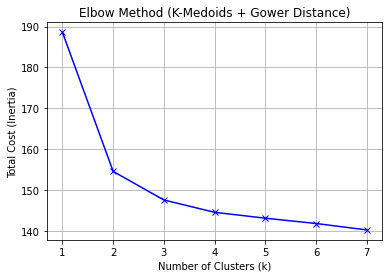


=== Silhouette Score  ===
📊 Silhouette Score untuk k=2: 0.27744579315185547
📊 Silhouette Score untuk k=3: 0.12025979906320572
📊 Silhouette Score untuk k=4: 0.09455399960279465
📊 Silhouette Score untuk k=5: 0.09887789934873581
📊 Silhouette Score untuk k=6: 0.0897986963391304
📊 Silhouette Score untuk k=7: 0.04258589819073677


In [ ]:
# === Data Used, Elbow Method, dan Silhouette Score ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score



# === Step 1: Load dataset ===
data = pd.read_csv('IAT_data_imported.csv')

print("Jumlah data sebelum menghapus missing value (nilai 99):", len(data))


# === Step 2: Select only the 20 IAT variables ===
original_vars = [
    'stay_online', 'neglect_chores', 'excitement', 'relationships', 'life_complaint',
    'school_work', 'email_socialmedia', 'job_performance', 'defensive_secretive',
    'disturbing_thoughts', 'online_anticipation', 'life_no_internet', 'act_annoyed',
    'late_night_logins', 'feel_preoccupied', 'online_glued', 'time_cutdown',
    'hide_online', 'more_online_time', 'feel_depressed'
]
data_subset = data[original_vars]


# === Step 3: Remove rows containing value 99 (treated as missing) ===
data_clean = data_subset.replace(99, np.nan).dropna()

print("Jumlah data setelah menghapus missing value:", len(data_clean))
print("Jumlah data yang dihapus:", len(data) - len(data_clean))
print("\nData setelah menghapus nilai 99:")
print(data_clean.head())


# === Step 4: Hitung Gower Distance Matrix ===
print("\nMenghitung Gower Distance Matrix...")
distance_matrix = gower.gower_matrix(data_clean)


# === Step 5: Elbow Method (Total Cost / Inertia) ===
print("\n=== Elbow Method (Within-Cluster Total Dissimilarity) ===")

wctd = []
K_elbow = range(1, 8)

for k in K_elbow:
    kmed = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmed.fit(distance_matrix)
    wctd.append(kmed.inertia_)
    


# === Plot Elbow Curve ===
plt.figure(figsize=(6, 4))
plt.plot(K_elbow, wctd, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Cost (Inertia)')
plt.title('Elbow Method (K-Medoids + Gower Distance)')
plt.grid(True)
plt.show()


# === Step 6: Silhouette Score for k = 2 to 7 ===
print("\n=== Silhouette Score  ===")

silhouette_scores = []

for k in range(2, 8):
    kmed = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmed.fit(distance_matrix)
    labels = kmed.labels_
    sil = silhouette_score(distance_matrix, labels, metric='precomputed')
    silhouette_scores.append(sil)
    print(f"📊 Silhouette Score untuk k={k}: {round(sil, 7)}")



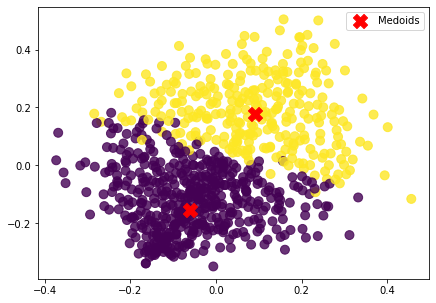

In [2]:
#Scatter Plot k=2
from sklearn.manifold import MDS

# === Step 5: Hitung Gower Distance ===
distance_matrix = gower.gower_matrix(data_clean)

# === Step 6: K-Medoids clustering ===
kmedoids = KMedoids(n_clusters=2, metric='precomputed', random_state=42)
kmedoids.fit(distance_matrix)


# === Step 7: Evaluasi Silhouette Score ===
silhouette_avg = silhouette_score(distance_matrix, kmedoids.labels_, metric="precomputed")

# === Step 8: Visualisasi dengan MDS (Scatter plot) ===
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(distance_matrix)

plt.figure(figsize=(7,5))
plt.scatter(coords[:,0], coords[:,1], c=kmedoids.labels_, cmap="viridis", s=80, alpha=0.8)
plt.scatter(coords[kmedoids.medoid_indices_,0], coords[kmedoids.medoid_indices_,1],
            c='red', marker='X', s=200, label='Medoids')
# plt.title("K-Medoids Clustering (setelah hapus 99)")
plt.legend()
plt.show()



=== Jumlah Subjek per Cluster ===
Cluster 1: 477 subjek
Cluster 2: 295 subjek

Membuat horizontal stacked bar chart nilai ordinal per variabel untuk setiap cluster...


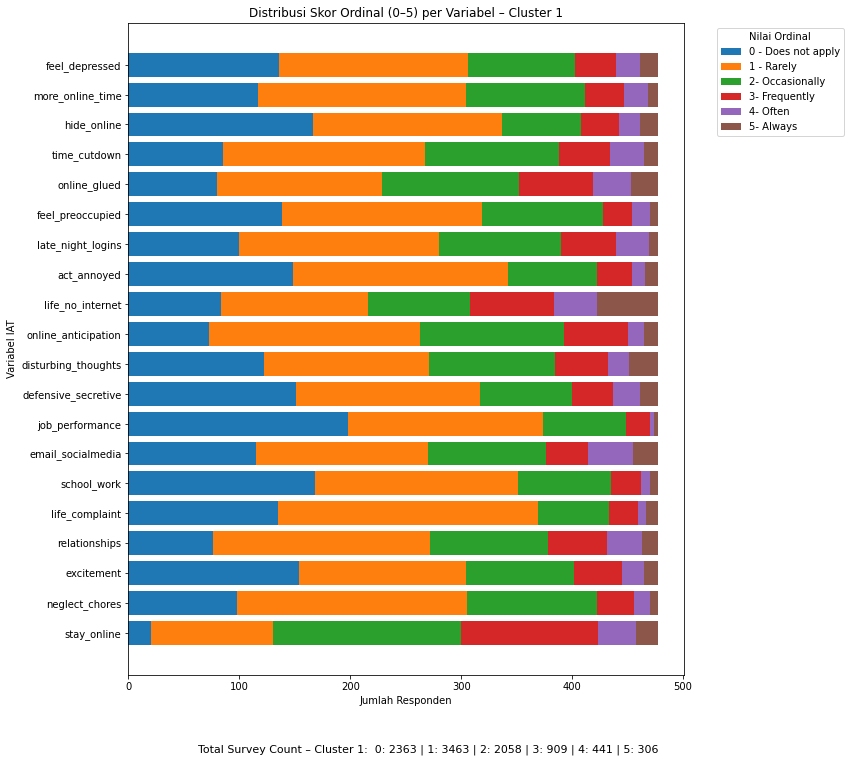

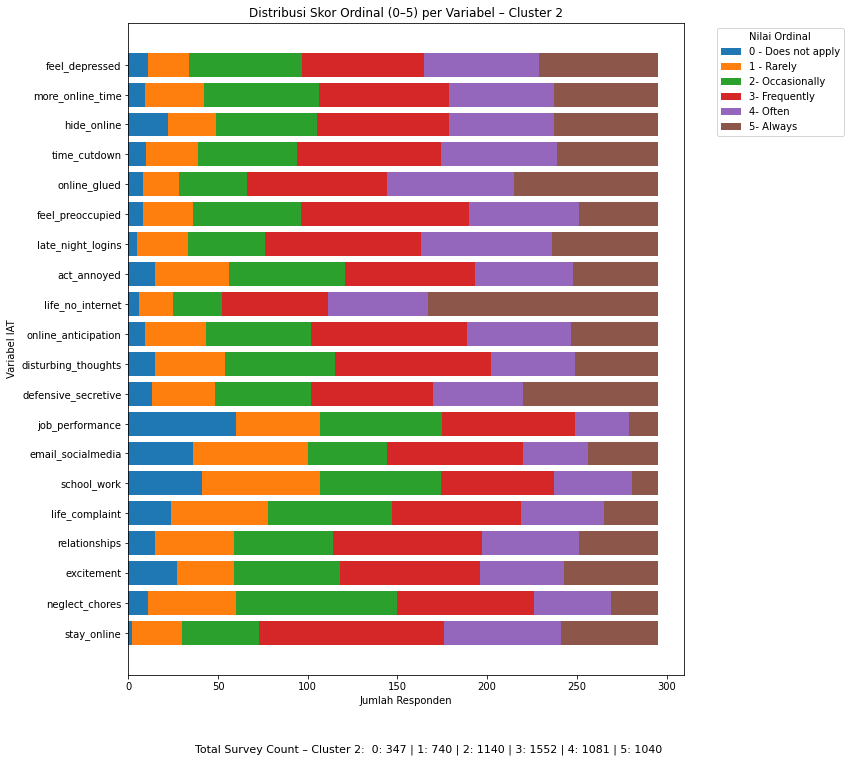

In [ ]:
# === Stacked Bar Chart K =2===

#==========================================================================


# === Step 7: Final K-Medoids Clustering (choose your k) ===
optimal_k = 2  # ganti jika perlu
kmed_final = KMedoids(n_clusters=optimal_k, metric='precomputed', random_state=42)
kmed_final.fit(distance_matrix)

# === Count how many subjects are in each cluster ===
cluster_counts = pd.Series(kmed_final.labels_ + 1).value_counts().sort_index()

print("\n=== Jumlah Subjek per Cluster ===")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} subjek")

#========================================================================================
# === Step 8: Horizontal Stacked Bar Chart per Cluster ===
print("\nMembuat horizontal stacked bar chart nilai ordinal per variabel untuk setiap cluster...")

labels_final = kmed_final.labels_ + 1
clustered_data = data_clean.copy()
clustered_data['Cluster'] = labels_final

ordinal_levels = [0, 1, 2, 3, 4, 5]

custom_labels = {
    0: "0 - Does not apply",
    1: "1 - Rarely",
    2: "2- Occasionally",
    3: "3- Frequently",
    4: "4- Often",
    5: "5- Always"
}

for c in range(1, optimal_k + 1):
    df_cluster = clustered_data[clustered_data['Cluster'] == c]

    freq = pd.DataFrame(index=original_vars, columns=ordinal_levels)

    for var in original_vars:
        vc = df_cluster[var].value_counts()
        for level in ordinal_levels:
            freq.loc[var, level] = vc.get(level, 0)

    freq = freq.fillna(0).astype(int)

    ordinal_totals = freq.sum(axis=0)
    summary_text = " | ".join([f"{level}: {ordinal_totals[level]}" for level in ordinal_levels])

    plt.figure(figsize=(12, 10))
    left = np.zeros(len(original_vars))

    for level in ordinal_levels:
        plt.barh(
            original_vars,
            freq[level],
            left=left,
            label=custom_labels[level]
        )
        left += freq[level]

    plt.title(f"Distribusi Skor Ordinal (0–5) per Variabel – Cluster {c}")
    plt.xlabel("Jumlah Responden")
    plt.ylabel("Variabel IAT")
    plt.legend(title="Nilai Ordinal", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.figtext(
        0.5, -0.05,
        f"Total Survey Count – Cluster {c}:  {summary_text}",
        ha="center", fontsize=11
    )

    plt.tight_layout()
    plt.show()

#=================================================================================



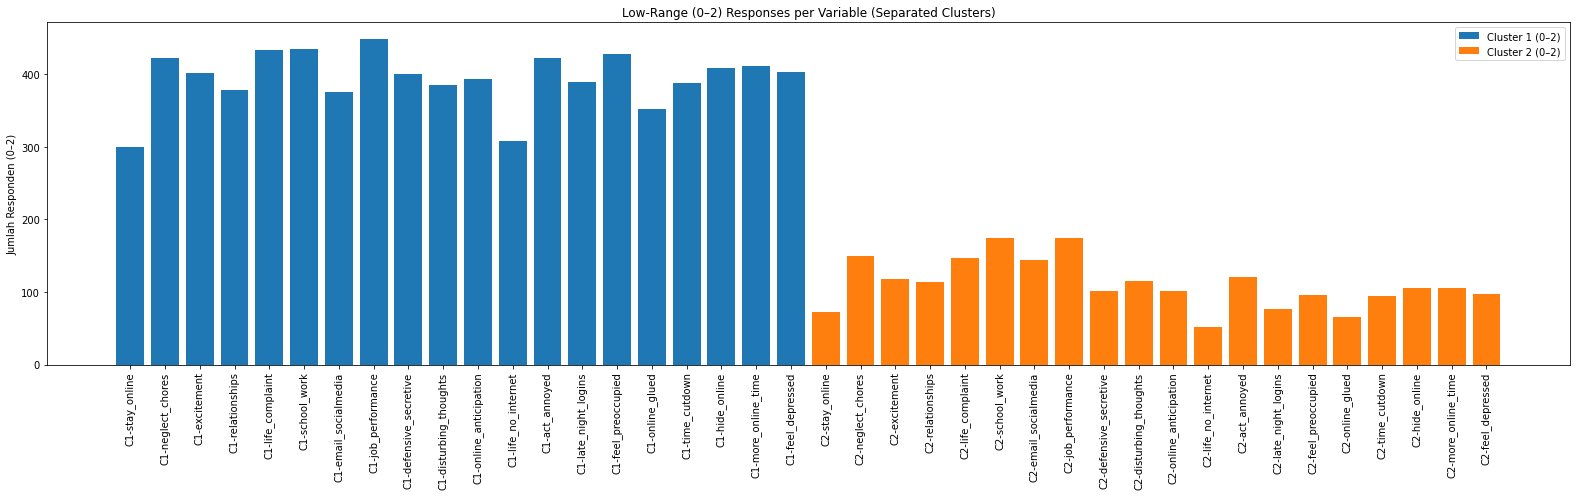

In [4]:
#=================================================================================
# === Pemisahan berdasarkan nilai kelompok ordinal terkecil (0-2) ===

# Count low-range (0,1,2) for each variable per cluster
low_cluster1 = []
low_cluster2 = []

for var in original_vars:
    low_cluster1.append(clustered_data[clustered_data["Cluster"] == 1][var].isin([0, 1, 2]).sum())
    low_cluster2.append(clustered_data[clustered_data["Cluster"] == 2][var].isin([0, 1, 2]).sum())

# X positions: 40 total bars → 20 cluster 1, then 20 cluster 2
x1 = np.arange(20)
x2 = np.arange(20, 40)

plt.figure(figsize=(22, 7))

# Plot cluster 1 bars
plt.bar(x1, low_cluster1, label="Cluster 1 (0–2)")

# Plot cluster 2 bars shifted to the right
plt.bar(x2, low_cluster2, label="Cluster 2 (0–2)")

# X-axis labels: combine C1 + C2 labels
combined_labels = [f"C1-{var}" for var in original_vars] + [f"C2-{var}" for var in original_vars]

plt.xticks(np.arange(40), combined_labels, rotation=90)

plt.ylabel("Jumlah Responden (0–2)")
plt.title("Low-Range (0–2) Responses per Variable (Separated Clusters)")
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
#=================================================================================
# === Create ranking tables per cluster (Low-range 0–2) ===

# Cluster 1 ranking table (low-range)
df_cluster1_low_rank = pd.DataFrame({
    "IAT Variable": original_vars,
    "Number of Participants (0–2)": low_cluster1
})

# Cluster 2 ranking table (low-range)
df_cluster2_low_rank = pd.DataFrame({
    "IAT Variable": original_vars,
    "Number of Participants (0–2)": low_cluster2
})


In [17]:
# === Top 10 variables for Cluster 1 (Low-range 0–2) ===
top10_low_cluster1 = (
    df_cluster1_low_rank
    .sort_values(by="Number of Participants (0–2)", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("\n=== Top 10 IAT Variables — Cluster 1 (Low Ordinal 0–2) ===")
print(top10_low_cluster1)


# === Top 10 variables for Cluster 2 (Low-range 0–2) ===
top10_low_cluster2 = (
    df_cluster2_low_rank
    .sort_values(by="Number of Participants (0–2)", ascending=False)
    .head(10)
    .reset_index(drop=True)
)




=== Top 10 IAT Variables — Cluster 1 (Low Ordinal 0–2) ===
       IAT Variable  Number of Participants (0–2)
0   job_performance                           449
1       school_work                           435
2    life_complaint                           433
3  feel_preoccupied                           428
4       act_annoyed                           422
5    neglect_chores                           422
6  more_online_time                           412
7       hide_online                           408
8    feel_depressed                           403
9        excitement                           402


In [18]:
print("\n=== Top 10 IAT Variables — Cluster 1 (Low Ordinal 0–2) ===")
print(top10_low_cluster1)



=== Top 10 IAT Variables — Cluster 1 (Low Ordinal 0–2) ===
       IAT Variable  Number of Participants (0–2)
0   job_performance                           449
1       school_work                           435
2    life_complaint                           433
3  feel_preoccupied                           428
4       act_annoyed                           422
5    neglect_chores                           422
6  more_online_time                           412
7       hide_online                           408
8    feel_depressed                           403
9        excitement                           402


In [19]:
print("\n=== Top 10 IAT Variables — Cluster 2 (Low Ordinal 0–2) ===")
print(top10_low_cluster2)


=== Top 10 IAT Variables — Cluster 2 (Low Ordinal 0–2) ===
          IAT Variable  Number of Participants (0–2)
0      job_performance                           175
1          school_work                           174
2       neglect_chores                           150
3       life_complaint                           147
4    email_socialmedia                           144
5          act_annoyed                           121
6           excitement                           118
7  disturbing_thoughts                           115
8        relationships                           114
9     more_online_time                           106



Separated bar chart with participant counts displayed on bars...


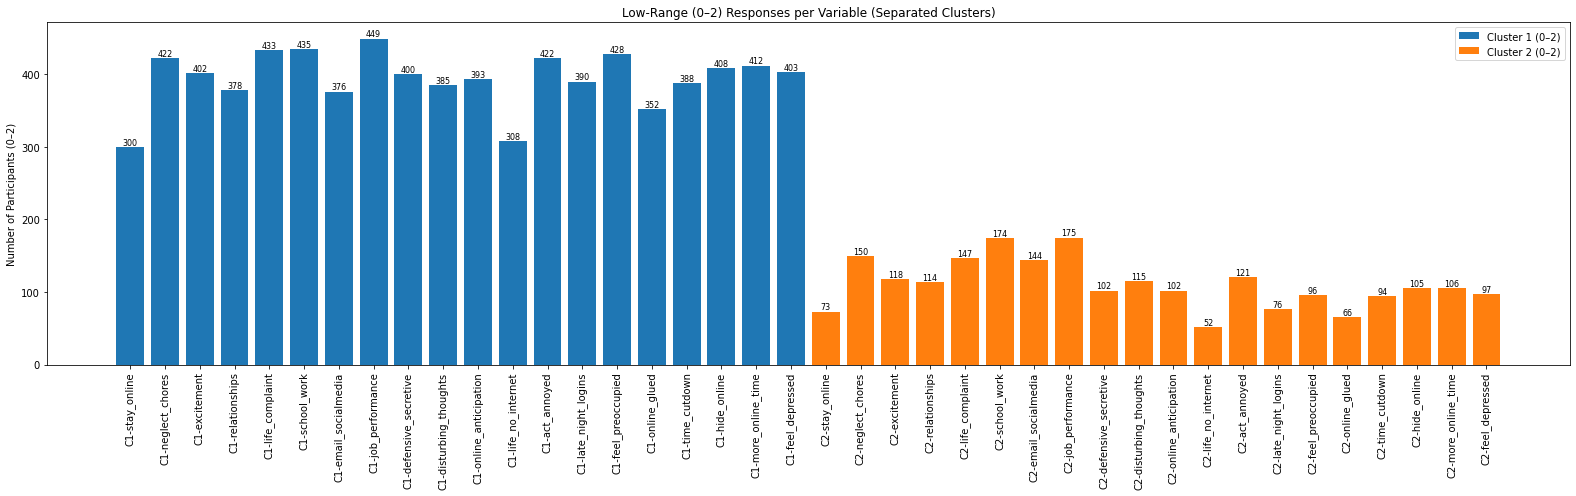

In [5]:
#=================================================================================
# === Separated Bar Chart with Value Labels (Cluster 1 left, Cluster 2 right) ===
print("\nSeparated bar chart with participant counts displayed on bars...")

# Count low-range (0,1,2) for each variable per cluster
low_cluster1 = []
low_cluster2 = []

for var in original_vars:
    low_cluster1.append(
        clustered_data[clustered_data["Cluster"] == 1][var].isin([0, 1, 2]).sum()
    )
    low_cluster2.append(
        clustered_data[clustered_data["Cluster"] == 2][var].isin([0, 1, 2]).sum()
    )

# X positions
x1 = np.arange(20)
x2 = np.arange(20, 40)

plt.figure(figsize=(22, 7))

bars1 = plt.bar(x1, low_cluster1, label="Cluster 1 (0–2)")
bars2 = plt.bar(x2, low_cluster2, label="Cluster 2 (0–2)")

# X-axis labels
combined_labels = (
    [f"C1-{var}" for var in original_vars] +
    [f"C2-{var}" for var in original_vars]
)

plt.xticks(np.arange(40), combined_labels, rotation=90)

plt.ylabel("Number of Participants (0–2)")
plt.title("Low-Range (0–2) Responses per Variable (Separated Clusters)")
plt.legend()

# === Add value labels on top of bars ===
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            str(height),
            ha="center",
            va="bottom",
            fontsize=8
        )

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()


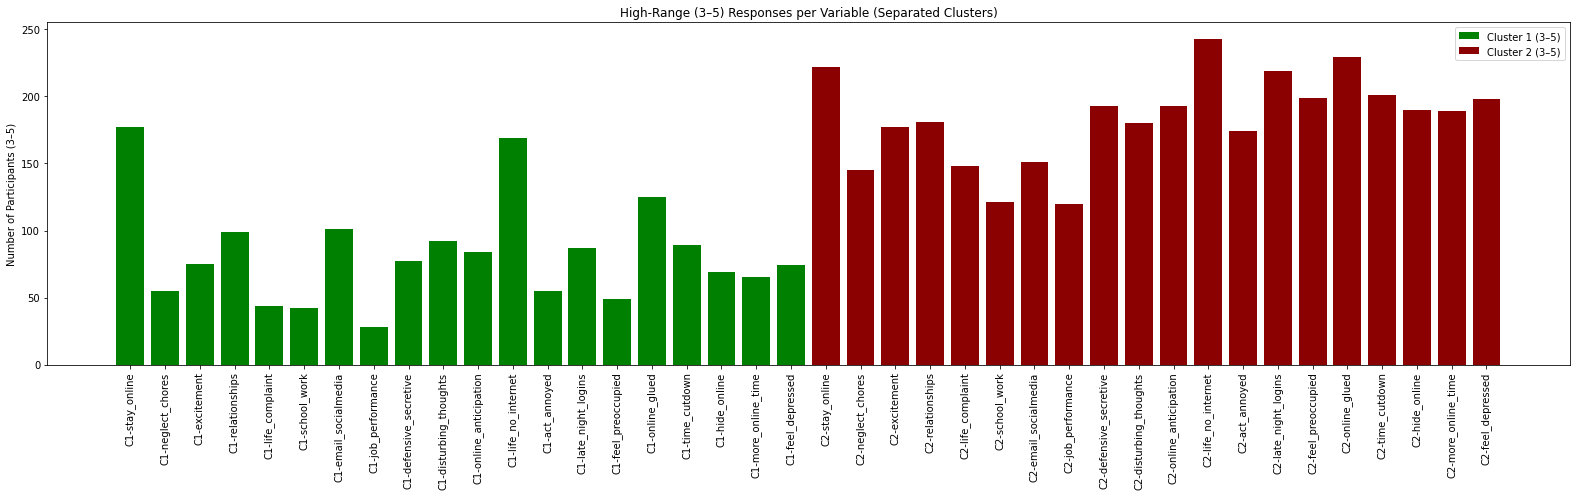

In [6]:
#=================================================================================
# === Pemisahan berdasarkan nilai kelompok ordinal terbesar (3-5) ===

# Count high-range (3,4,5) for each variable per cluster
high_cluster1 = []
high_cluster2 = []

for var in original_vars:
    high_cluster1.append(
        clustered_data[clustered_data["Cluster"] == 1][var].isin([3, 4, 5]).sum()
    )
    high_cluster2.append(
        clustered_data[clustered_data["Cluster"] == 2][var].isin([3, 4, 5]).sum()
    )

# X positions: 40 total bars → 20 cluster 1, then 20 cluster 2
x1 = np.arange(20)
x2 = np.arange(20, 40)

plt.figure(figsize=(22, 7))

# Plot cluster 1 bars (green)
plt.bar(
    x1,
    high_cluster1,
    color="green",
    label="Cluster 1 (3–5)"
)

# Plot cluster 2 bars (dark red)
plt.bar(
    x2,
    high_cluster2,
    color="darkred",
    label="Cluster 2 (3–5)"
)

# X-axis labels
combined_labels = (
    [f"C1-{var}" for var in original_vars] +
    [f"C2-{var}" for var in original_vars]
)

plt.xticks(np.arange(40), combined_labels, rotation=90)

plt.ylabel("Number of Participants (3–5)")
plt.title("High-Range (3–5) Responses per Variable (Separated Clusters)")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#=================================================================================
# === Create ranking tables per cluster (High-range 3–5) ===

# Cluster 1 ranking table
df_cluster1_rank = pd.DataFrame({
    "IAT Variable": original_vars,
    "Number of Participants (3–5)": high_cluster1
})

# Cluster 2 ranking table
df_cluster2_rank = pd.DataFrame({
    "IAT Variable": original_vars,
    "Number of Participants (3–5)": high_cluster2
})

# === Top 10 variables for Cluster 1 ===
top10_cluster1 = (
    df_cluster1_rank
    .sort_values(by="Number of Participants (3–5)", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("\n=== Top 10 IAT Variables — Cluster 1 (High Ordinal 3–5) ===")
print(top10_cluster1)


# === Top 10 variables for Cluster 2 ===
top10_cluster2 = (
    df_cluster2_rank
    .sort_values(by="Number of Participants (3–5)", ascending=False)
    .head(10)
    .reset_index(drop=True)
)



=== Top 10 IAT Variables — Cluster 1 (High Ordinal 3–5) ===
          IAT Variable  Number of Participants (3–5)
0          stay_online                           177
1     life_no_internet                           169
2         online_glued                           125
3    email_socialmedia                           101
4        relationships                            99
5  disturbing_thoughts                            92
6         time_cutdown                            89
7    late_night_logins                            87
8  online_anticipation                            84
9  defensive_secretive                            77

=== Top 10 IAT Variables — Cluster 2 (High Ordinal 3–5) ===
          IAT Variable  Number of Participants (3–5)
0     life_no_internet                           243
1         online_glued                           229
2          stay_online                           222
3    late_night_logins                           219
4         time_cutdown        

In [ ]:
print("\n=== Top 10 IAT Variables — Cluster 1 (High Ordinal 3–5) ===")
print(top10_cluster1)


In [ ]:
print("\n=== Top 10 IAT Variables — Cluster 2 (High Ordinal 3–5) ===")
print(top10_cluster2)


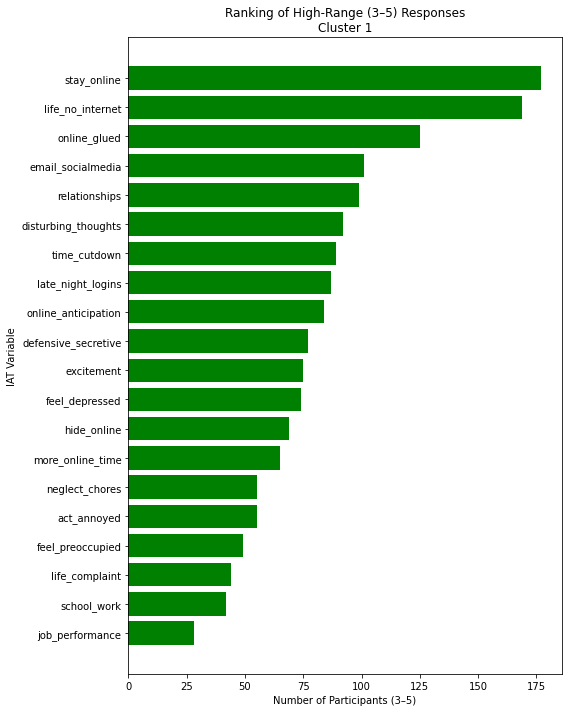

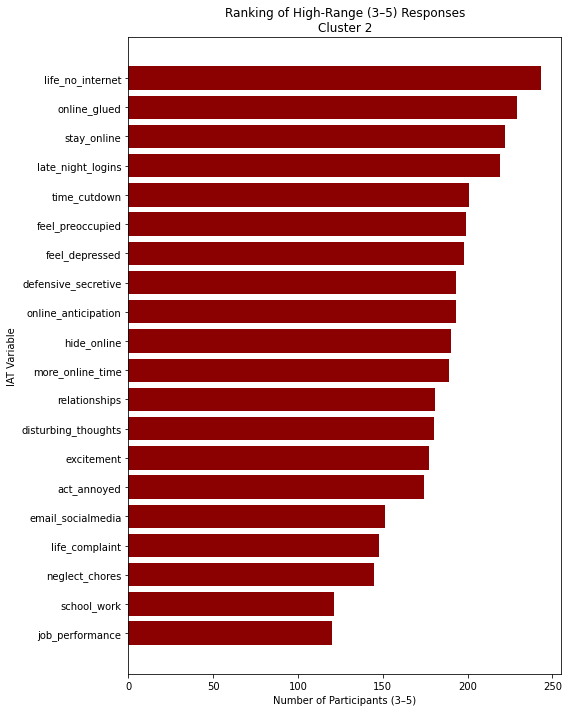

In [8]:
#=================================================================================
# === Ranking Chart: Cluster 1 (High-Range 3–5) ===

ranking_c1 = pd.DataFrame({
    "Variable": original_vars,
    "High_Count": high_cluster1
}).sort_values("High_Count", ascending=False)

plt.figure(figsize=(8, 10))
plt.barh(
    ranking_c1["Variable"],
    ranking_c1["High_Count"],
    color="green"
)

plt.xlabel("Number of Participants (3–5)")
plt.ylabel("IAT Variable")
plt.title("Ranking of High-Range (3–5) Responses\nCluster 1")

plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()
#=======================================================
#=================================================================================
# === Ranking Chart: Cluster 2 (High-Range 3–5) ===

ranking_c2 = pd.DataFrame({
    "Variable": original_vars,
    "High_Count": high_cluster2
}).sort_values("High_Count", ascending=False)

plt.figure(figsize=(8, 10))
plt.barh(
    ranking_c2["Variable"],
    ranking_c2["High_Count"],
    color="darkred"
)

plt.xlabel("Number of Participants (3–5)")
plt.ylabel("IAT Variable")
plt.title("Ranking of High-Range (3–5) Responses\nCluster 2")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



Separated bar chart with participant counts displayed on bars (3–5)...


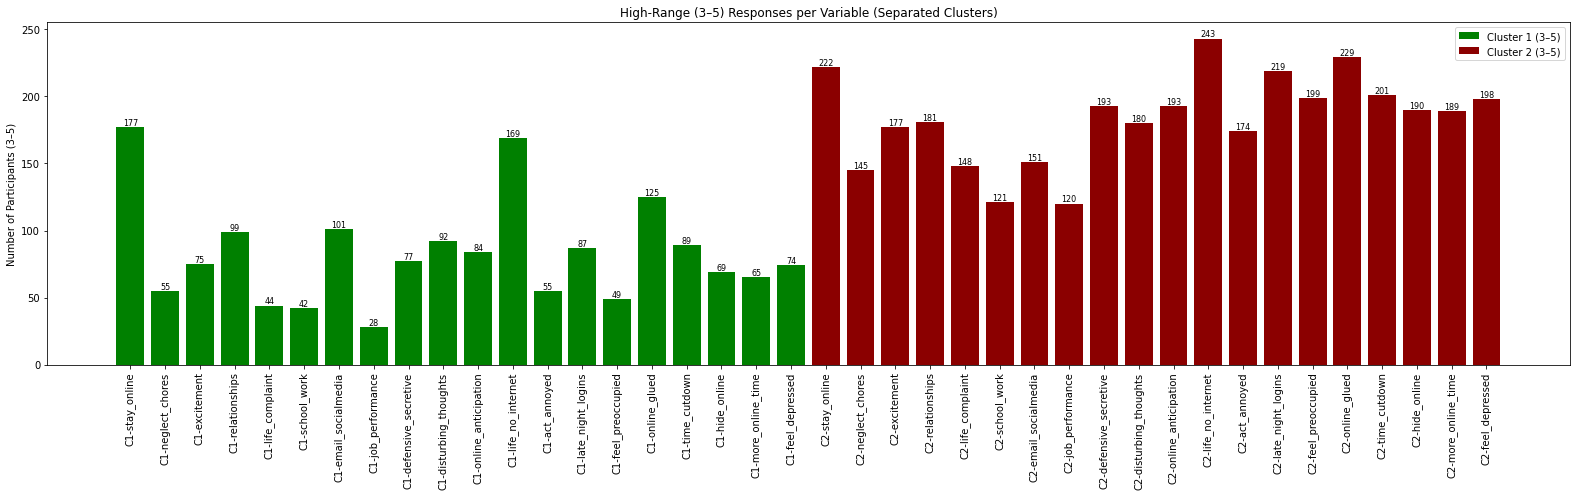

In [10]:
#=================================================================================
# === Separated Bar Chart with Value Labels (High-Range 3–5) ===
print("\nSeparated bar chart with participant counts displayed on bars (3–5)...")

# Count high-range (3,4,5) for each variable per cluster
high_cluster1 = []
high_cluster2 = []

for var in original_vars:
    high_cluster1.append(
        clustered_data[clustered_data["Cluster"] == 1][var].isin([3, 4, 5]).sum()
    )
    high_cluster2.append(
        clustered_data[clustered_data["Cluster"] == 2][var].isin([3, 4, 5]).sum()
    )
# X positions
x1 = np.arange(20)
x2 = np.arange(20, 40)

plt.figure(figsize=(22, 7))

bars1 = plt.bar(
    x1,
    high_cluster1,
    color="green",
    label="Cluster 1 (3–5)"
)

bars2 = plt.bar(
    x2,
    high_cluster2,
    color="darkred",
    label="Cluster 2 (3–5)"
)

# X-axis labels
combined_labels = (
    [f"C1-{var}" for var in original_vars] +
    [f"C2-{var}" for var in original_vars]
)

plt.xticks(np.arange(40), combined_labels, rotation=90)

plt.ylabel("Number of Participants (3–5)")
plt.title("High-Range (3–5) Responses per Variable (Separated Clusters)")
plt.legend()

# === Add value labels on top of bars ===
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            str(height),
            ha="center",
            va="bottom",
            fontsize=8
        )

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()



Membuat grafik bar ordinal (0–5) dengan gradasi warna per cluster...


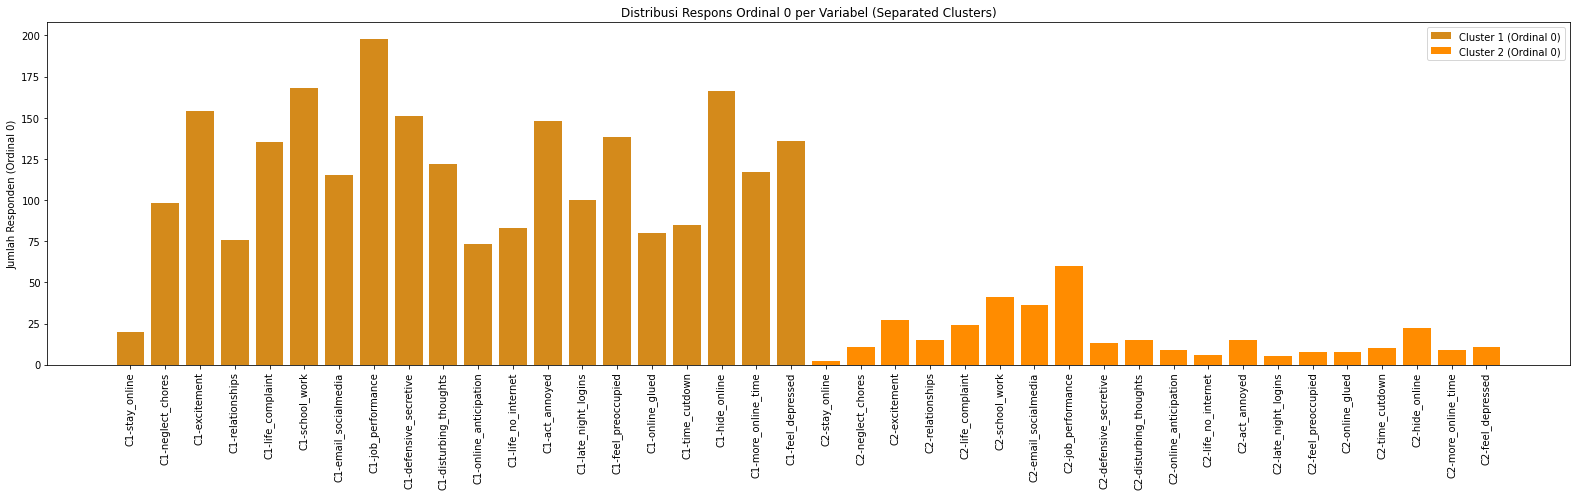

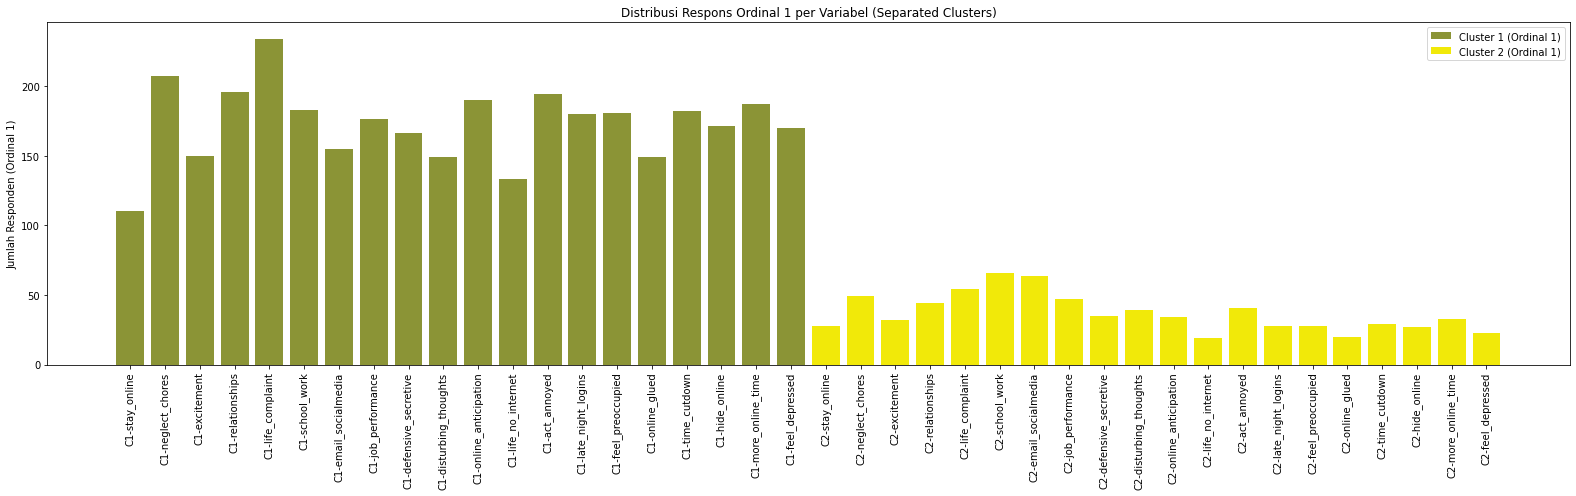

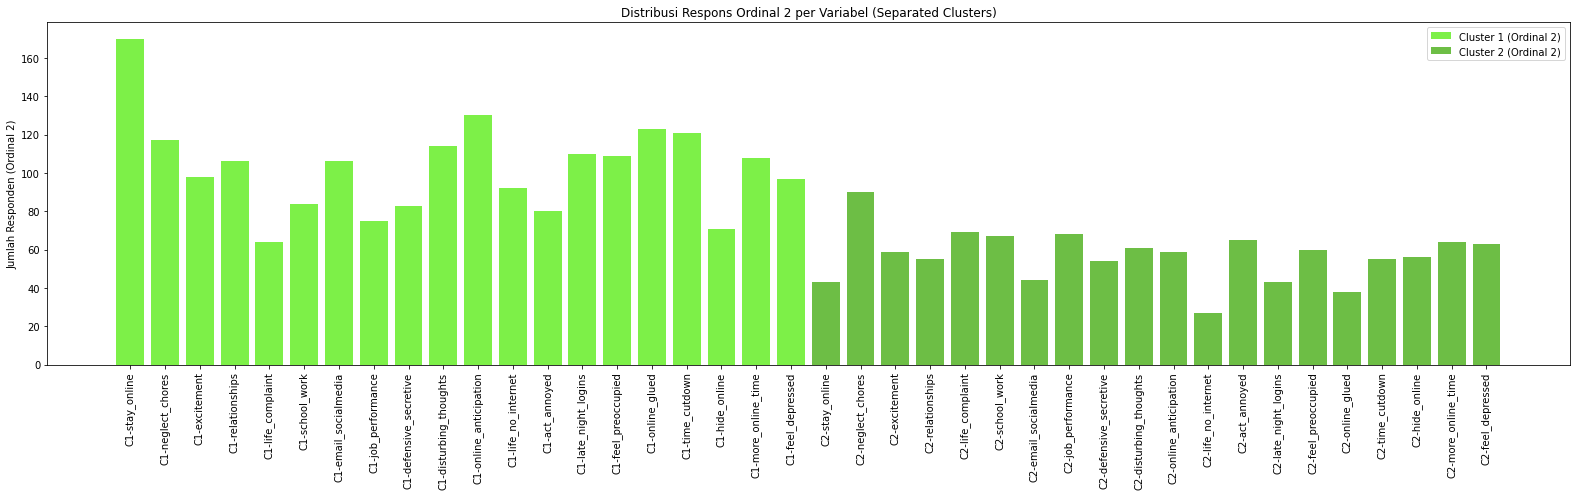

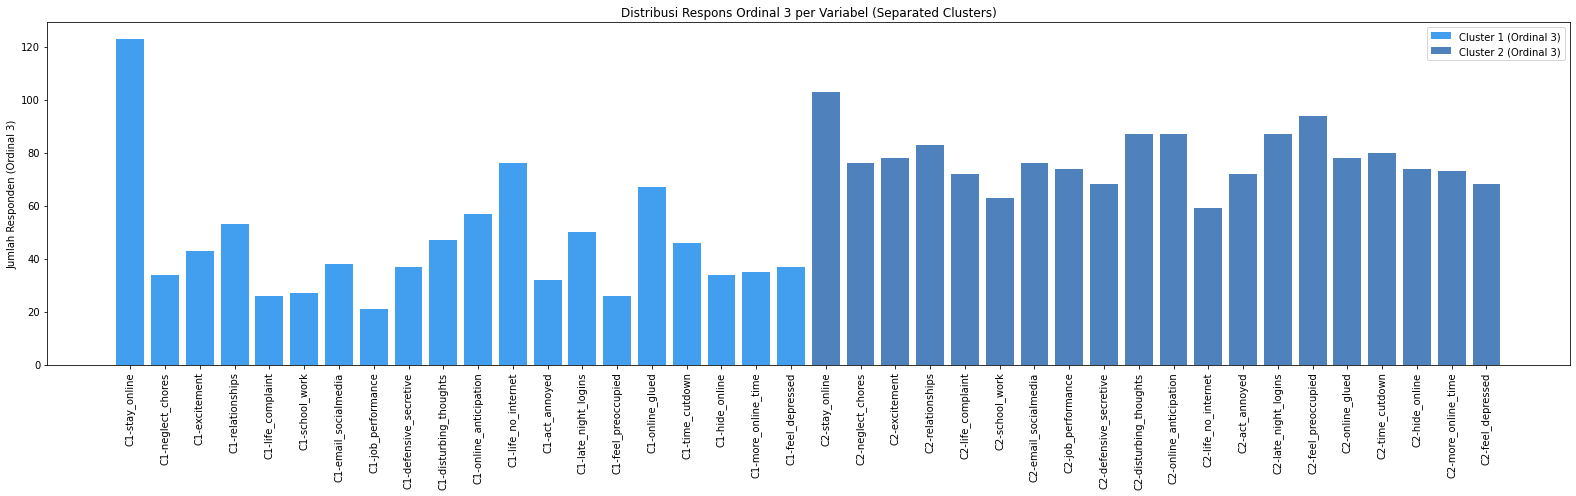

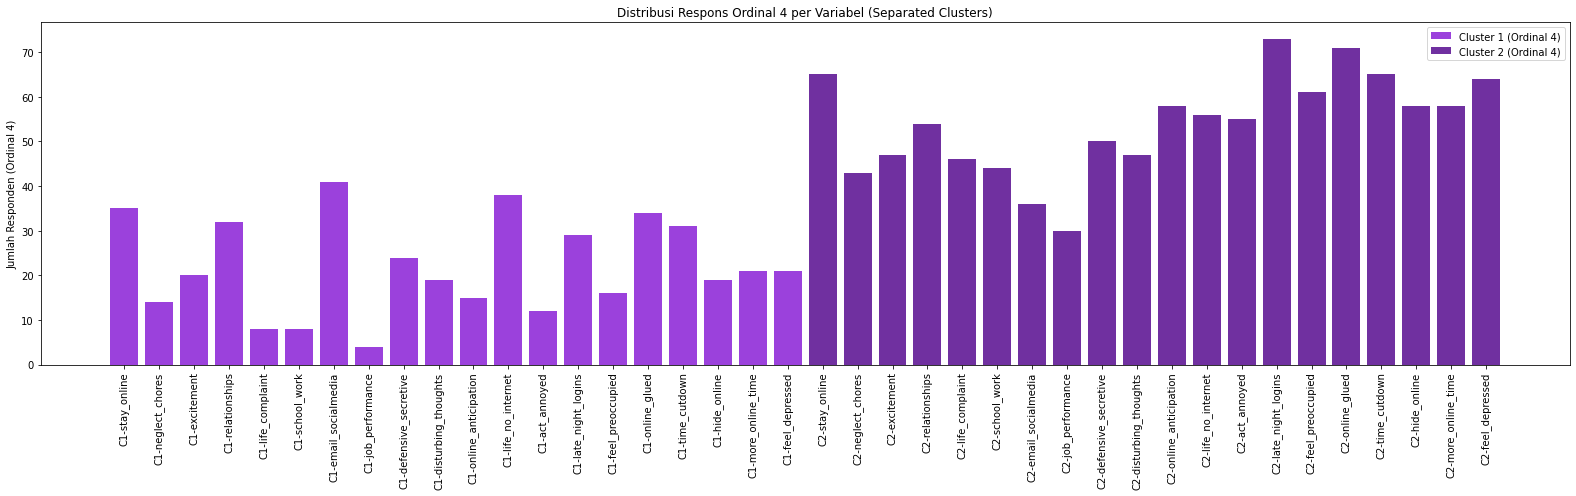

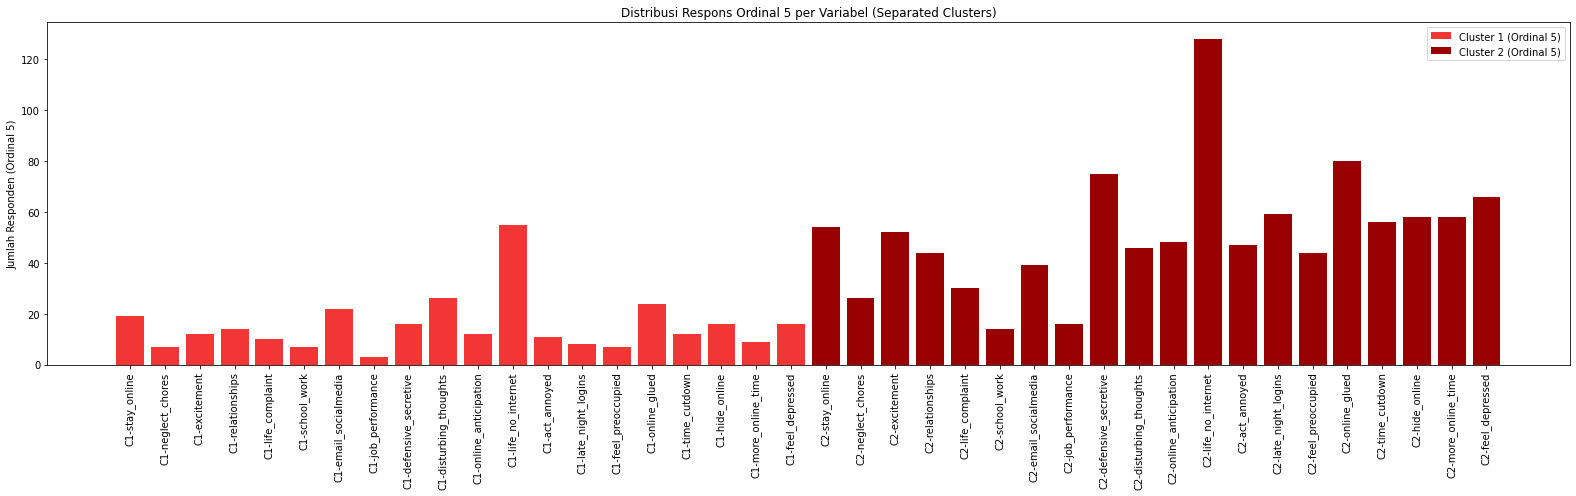

In [11]:
#=================================================================================
# === Step X: Ordinal-Level Separated Bar Charts with Color Gradation ===
print("\nMembuat grafik bar ordinal (0–5) dengan gradasi warna per cluster...")

ordinal_colors = {
    0: ("#D48A1B", "#FF8C00"),   # orange
    1: ("#8B9436", "#F1E909"),   # amber
    2: ("#7DF048", "#6DBE45"),   # green
    3: ("#429FF0", "#4F81BD"),   # blue
    4: ("#9B41DC", "#7030A0"),   # purple
    5: ("#F23636", "#990000")    # red
}

for ord_val in range(6):

    cluster1_counts = []
    cluster2_counts = []

    for var in original_vars:
        cluster1_counts.append(
            clustered_data[clustered_data["Cluster"] == 1][var].eq(ord_val).sum()
        )
        cluster2_counts.append(
            clustered_data[clustered_data["Cluster"] == 2][var].eq(ord_val).sum()
        )

    x1 = np.arange(len(original_vars))
    x2 = np.arange(len(original_vars), 2 * len(original_vars))

    plt.figure(figsize=(22, 7))

    # Cluster 1 (lighter shade)
    plt.bar(
        x1,
        cluster1_counts,
        color=ordinal_colors[ord_val][0],
        label=f"Cluster 1 (Ordinal {ord_val})"
    )

    # Cluster 2 (darker shade)
    plt.bar(
        x2,
        cluster2_counts,
        color=ordinal_colors[ord_val][1],
        label=f"Cluster 2 (Ordinal {ord_val})"
    )

    combined_labels = (
        [f"C1-{var}" for var in original_vars] +
        [f"C2-{var}" for var in original_vars]
    )

    plt.xticks(np.arange(2 * len(original_vars)), combined_labels, rotation=90)
    plt.ylabel(f"Jumlah Responden (Ordinal {ord_val})")
    plt.title(f"Distribusi Respons Ordinal {ord_val} per Variabel (Separated Clusters)")
    plt.legend()

    plt.tight_layout()
    plt.show()
